In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Input-output generation
def generate_xy(h, N, sigma = 0.1):
    x = np.random.normal(0, 1, N)
    y = np.convolve(x, h)
    y += np.random.normal(0, sigma, len(y))  # Additive Gaussian noise
    
    return x,y

In [3]:
def lms(x, y, K, mu = 0.01):
    N = len(x)
    w = np.zeros(K)  # Adaptive filter: initialize
    xn = np.zeros(K)  # Array to store [x[n],x[n-1],...,x[n-K+1]]
    y_err = np.zeros(N)  # Array to record filtering error
    
    for n in range(N):
        xn[0] = x[n]  # Update most recent (current) value
        y_predict = np.dot(xn, w)  # Predict y by xn^T w 
        e = y_predict - y[n]  # Prediction error
        w = w - mu * e * xn  # Update filter by gradient descent
        xn = np.roll(xn, 1)  # Circularly shift right by one sample
        y_err[n] = e
        
    return w, y_err

Estimated filter = [ 1.09728085  1.99508706  2.94246013  4.03496172  5.02566837  0.00569192
 -0.01385501  0.03589511]


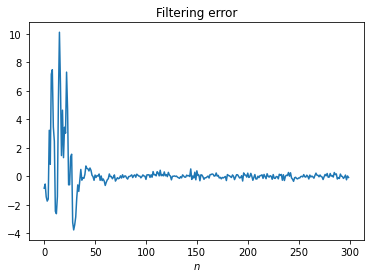

In [4]:
h = np.array([1,2,3,4,5]) # Ground truth filter
N = 300
x, y = generate_xy(h, N)

# Appropriate choice of learning rate
mu = 0.1
K = 8
w, y_err = lms(x, y, K, mu)

print('Estimated filter =', w)

plt.plot(y_err)
plt.title('Filtering error')
plt.xlabel('$n$');